In [1]:
# basics
import os
import time
import numpy as np
import pandas as pd

# scipy and sklearn
from scipy.stats import entropy
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# plotting
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
import seaborn as sns
from IPython.display import Image
from matplotlib.patches import Rectangle

# CMDGB
import graphviz
from CMGDB import PlotMorseSets, PlotMorseGraph

# local
from data_loaders import retrieve_predictions
from models import *
from utils import get_model_weights, convert_weight_dict_to_dataframe, compute_morse_graph, \
                  compute_morse_graph_with_gpflow_gp, compute_order_retraction, PlotOrderRetraction

sns.set()
plt.style.use('ggplot')
%matplotlib inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Timing Order Retraction with Different Phase Subdivisions
Due to the need to restart kernel before each run, will need to do this manually for each phase subdivision ...

** Make sure to restart kernel before each new config run! Easiest way is to click on "Restart & Run All"

In [3]:
interesting_iris = "iris_epoch_450"
smallest_or_largest = "largest"

[-2.61753082 -2.89198698]


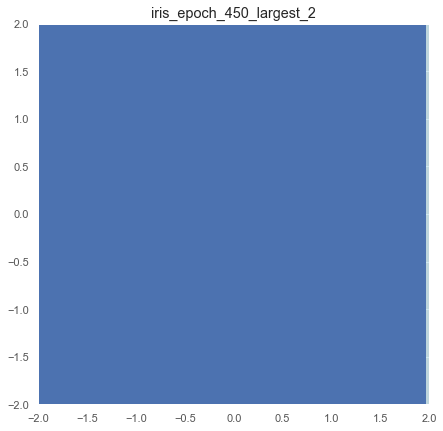

time = 0.33 seconds


In [4]:
weights = get_model_weights("./data/{}".format(interesting_iris))
weights = convert_weight_dict_to_dataframe(weights)

final_weights = weights.loc[weights["epoch"] != "1"]    
weight_cols = [c for c in list(final_weights.columns) if c not in ["model_id", "epoch", "val_loss"]]
std_df = pd.DataFrame(columns=["weight_name", "std"],
                      data=list(zip(weight_cols, [np.std(final_weights[col]) for col in weight_cols])))
std_df = std_df.sort_values(by="std")

if smallest_or_largest == "smallest":
    two_weights = list(std_df["weight_name"])[:2]
elif smallest_or_largest == "largest":
    two_weights = list(std_df["weight_name"])[-2:]
else:
    raise ValueError()

start_time = time.time()
# this is where we change the number of phase subdivisions.
morseg, mapg = compute_morse_graph(weights[['epoch'] + two_weights], phase_subdiv=5)
compute_order_retraction(morseg, mapg, title="{}_{}_2".format(interesting_iris, smallest_or_largest))
print("time = {:.2f} seconds".format(time.time() - start_time))

Manually populate the timing data: Create DataFrame of phase subdivisions and times manually based on above print-outs

In [5]:
subdiv_df = pd.DataFrame(columns=["Phase Subdivision", "Time (seconds)"])
subdiv_df.loc[len(subdiv_df)] = [5, 0.33]
subdiv_df.loc[len(subdiv_df)] = [6, 0.4]
subdiv_df.loc[len(subdiv_df)] = [7, 0.61]
subdiv_df.loc[len(subdiv_df)] = [8, 0.82]
subdiv_df.loc[len(subdiv_df)] = [9, 1.46]
subdiv_df.loc[len(subdiv_df)] = [10, 2.65]
subdiv_df.loc[len(subdiv_df)] = [11, 4.73]
subdiv_df.loc[len(subdiv_df)] = [12, 8.94]
subdiv_df.loc[len(subdiv_df)] = [13, 17.93]
subdiv_df.loc[len(subdiv_df)] = [14, 35.78]
subdiv_df.loc[len(subdiv_df)] = [15, 68.59]
subdiv_df.loc[len(subdiv_df)] = [16, 123.81]
subdiv_df.loc[len(subdiv_df)] = [17, 297.46]

In [6]:
subdiv_df["Phase Subdivision"] = subdiv_df["Phase Subdivision"].astype(int)
subdiv_df

,Phase Subdivision,Time (seconds)
0,5,0.33
1,6,0.40
2,7,0.61
3,8,0.82
4,9,1.46
5,10,2.65
6,11,4.73
7,12,8.94
8,13,17.93
9,14,35.78


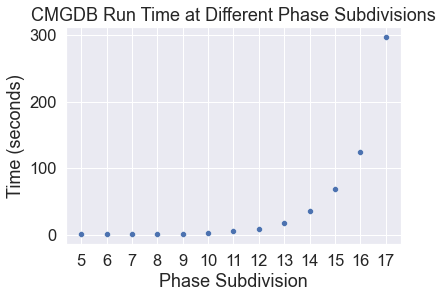

In [7]:
sns.set(font_scale=1.5, font="Arial")
sns.scatterplot(data=subdiv_df, x="Phase Subdivision", y="Time (seconds)")

plt.xticks(subdiv_df["Phase Subdivision"])
plt.title("CMGDB Run Time at Different Phase Subdivisions")

plt.show()